<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/Main_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Assignment 
## Written by Abiola Obembe
### Date: 2021-02-24
### Course: ML masters with deployment and deep learning
### Objective: Predicting Survival in the Titanic Data Set
-----------------------------------------------------------------------------
### ----------  Assignment starts here -------------------------------------------------

## Dataset
In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.

In [1]:
# Loading Data and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 


# Import other libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)



Libraries installed successfully!


In [2]:
# Load dataset and print feature columns
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# Print shape of features
features.shape

(506, 13)

In [4]:
# Print dataframe info
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
# Print target column
print(targets[0:5])


[24.  21.6 34.7 33.4 36.2]


In [6]:
# Print shape of target 
targets.shape

(506,)

## Explorartory Data Analysis

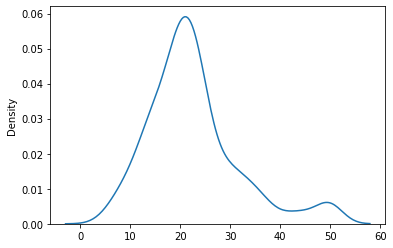

In [7]:
# Examine the shape of the target field if it is normally distribute 
sns.kdeplot(x= targets)
plt.show()

In [8]:
# Bascic statistics
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
# Check for missing values
print("The missing values in each column are as below :")
features.isna().sum()

The missing values in each column are as below :


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

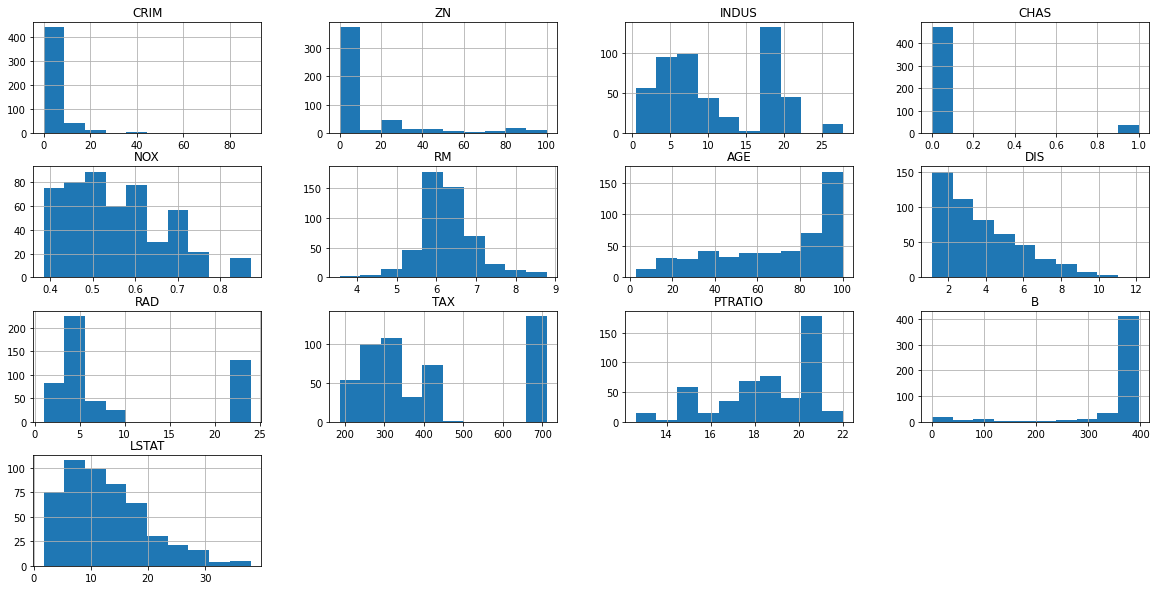

In [10]:
# Visualize histogram of dataset
features.hist(figsize= (20,10), bins= 10)
plt.show()

In [11]:
# Extract numerical and categorical columns from train dataframe
numerical_cols = [cname for cname in features.columns if
                features[cname].dtype in ['int64', 'float64']]

# Extract categorical features from dataframe
category_cols = [col for col in features.columns if features[col].dtype == "object"]
category_features = category_cols.copy()



In [12]:
# Let us see the cardanilatity of each column for the categorical columns in train and test set
# Unique value sin each columns
for cols in category_features:
    print("Unique values in", cols,  "column in dataset:", features[cols].nunique())
    print("*"*80)

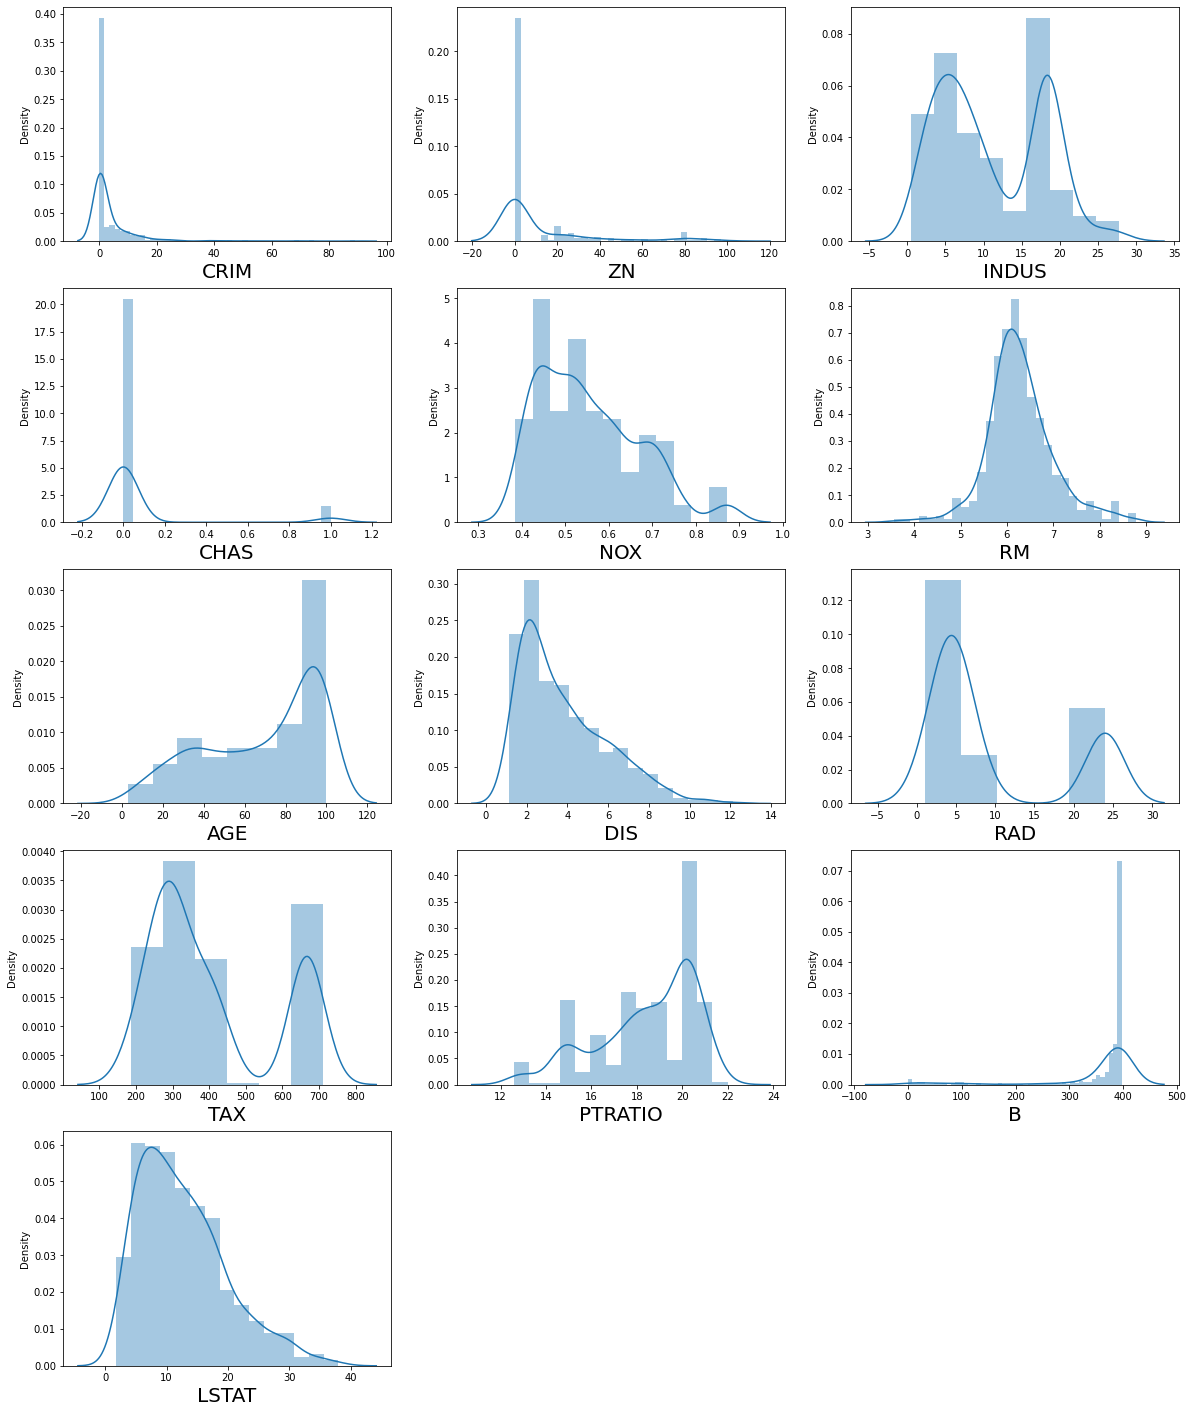

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in features[numerical_cols]:
    if plotnumber<= 16 :     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(features[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
# Calculate the skewness and kurtosis values
for col in features[numerical_cols].columns:
    print(col)
    print("skewness:", features[col].skew())
    print("kurtosis:", features[col].kurtosis())
    print('-'*35)

CRIM
skewness: 5.223148798243851
kurtosis: 37.13050912952203
-----------------------------------
ZN
skewness: 2.2256663227354307
kurtosis: 4.031510083739155
-----------------------------------
INDUS
skewness: 0.29502156787351164
kurtosis: -1.2335396011495188
-----------------------------------
CHAS
skewness: 3.405904172058746
kurtosis: 9.638263777819526
-----------------------------------
NOX
skewness: 0.7293079225348787
kurtosis: -0.06466713336542629
-----------------------------------
RM
skewness: 0.40361213328874385
kurtosis: 1.8915003664993404
-----------------------------------
AGE
skewness: -0.5989626398812962
kurtosis: -0.9677155941626912
-----------------------------------
DIS
skewness: 1.0117805793009007
kurtosis: 0.4879411222443908
-----------------------------------
RAD
skewness: 1.0048146482182057
kurtosis: -0.8672319936034931
-----------------------------------
TAX
skewness: 0.669955941795016
kurtosis: -1.1424079924768082
-----------------------------------
PTRATIO
skewnes

CRM, ZN, CHAS,  and B are skewed & heavy tailed due to large skewness and kurtosis values

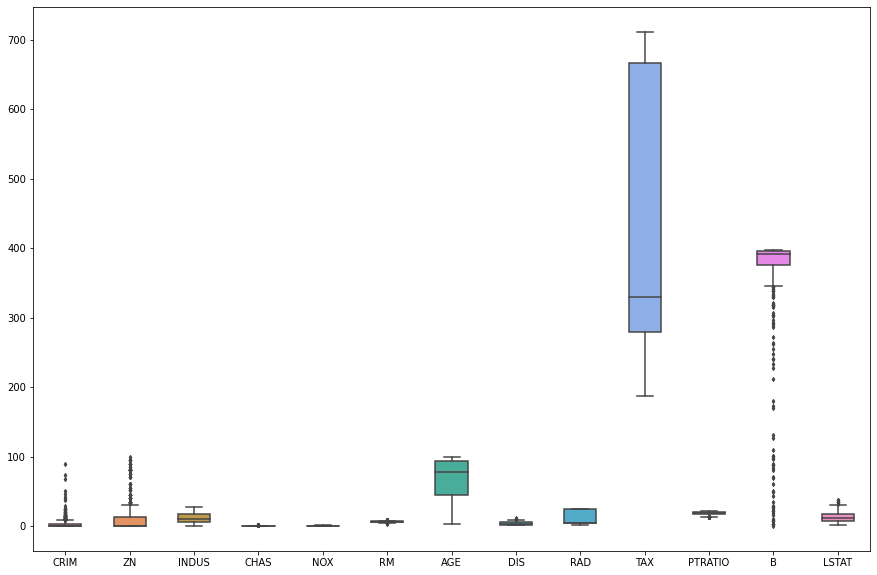

In [15]:
# Check for ouliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=features, width= 0.5,ax=ax,  fliersize=3)
plt.show()

In [16]:
# Extract column names
column_names = features.columns.to_list()
column_names.append('PRICE')
column_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']

In [17]:
# Extract features at a numpy array
X = features.iloc[:,:].values
y = targets.reshape(len(targets),1)

# Concatentae X and tatget columns
data = np.concatenate((X,y),axis = 1)
data= pd.DataFrame(data,columns= column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(data))
zscore

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [19]:
# Check for the presence of outliers
print(np.where(zscore>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [20]:
# print two random points
print(zscore[55,1])
print(zscore[56,1])

3.375038763517309
3.1604409230624513


In [21]:
# For simplicity remove all data with outliers
data_clean = data.copy()

data_clean = data_clean[(zscore < 3).all(axis = 1)]
print("The shape of the original dataframe is :", data.shape)
print("The shape of the clean dataframe is :", data_clean.shape)
data_clean.reset_index(drop= True)


deleted_entries = data.shape[0] - data_clean.shape[0]
print("Entries deleted in the dataframe are :",  deleted_entries)

The shape of the original dataframe is : (506, 14)
The shape of the clean dataframe is : (415, 14)
Entries deleted in the dataframe are : 91


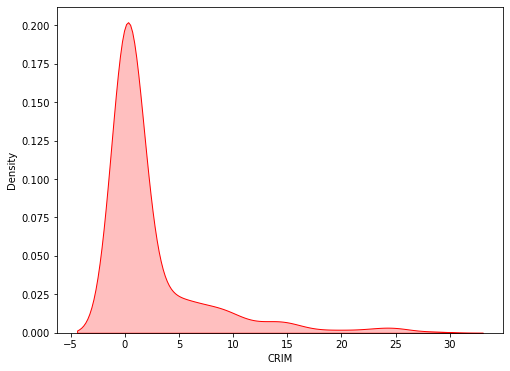

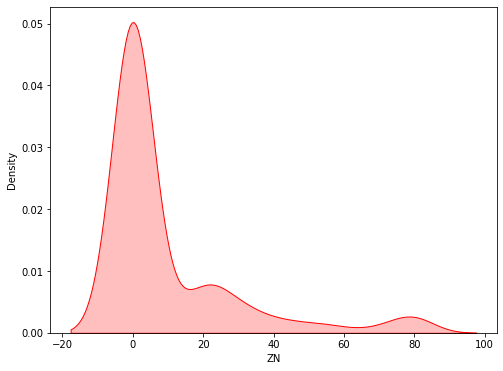

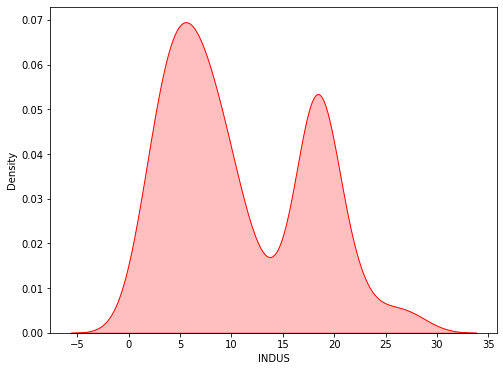

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


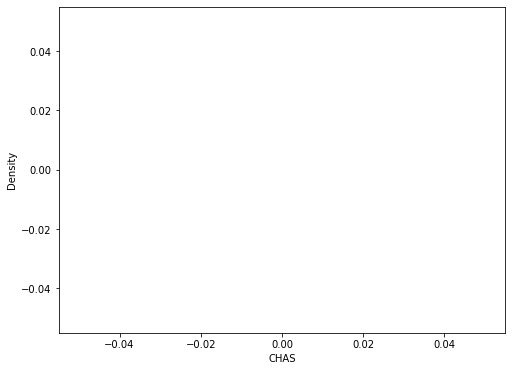

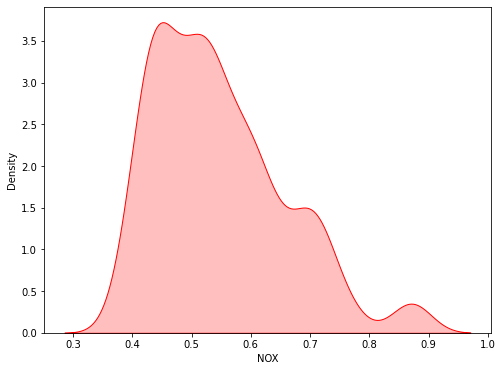

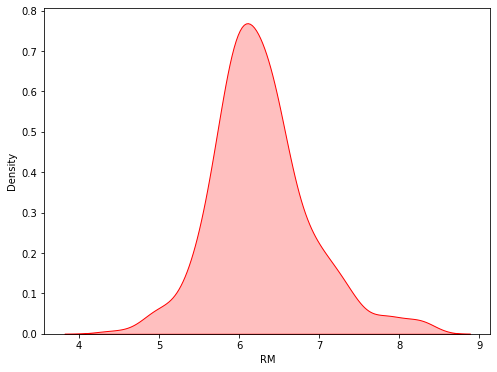

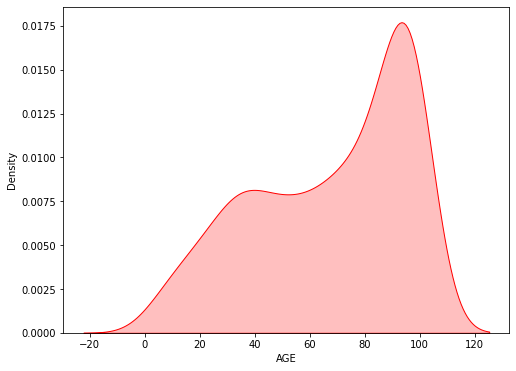

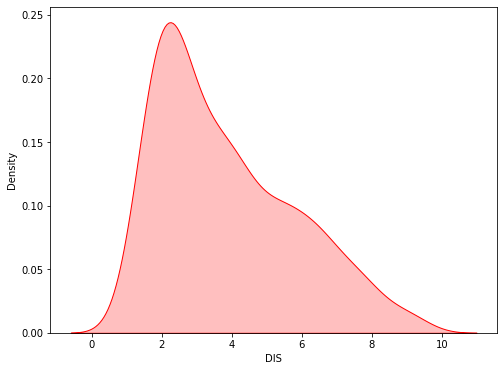

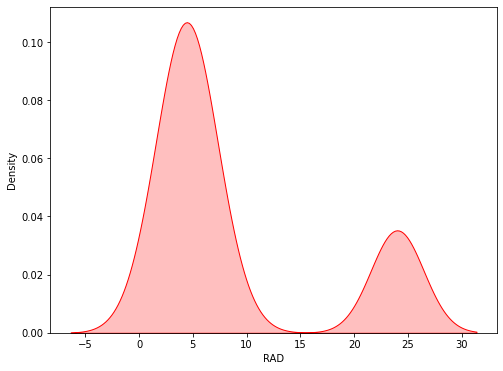

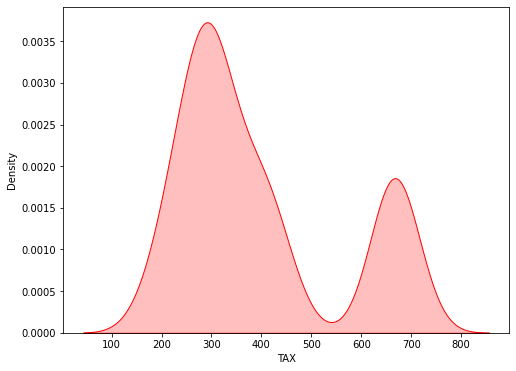

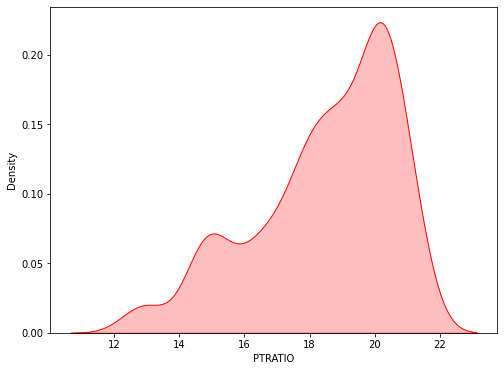

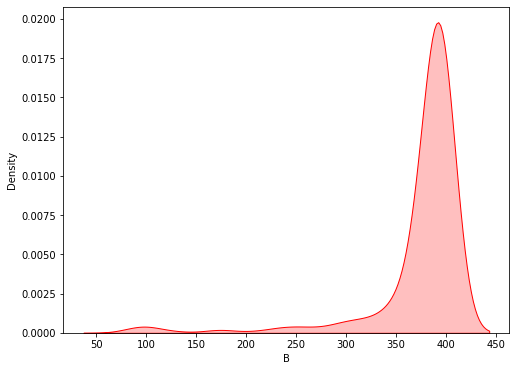

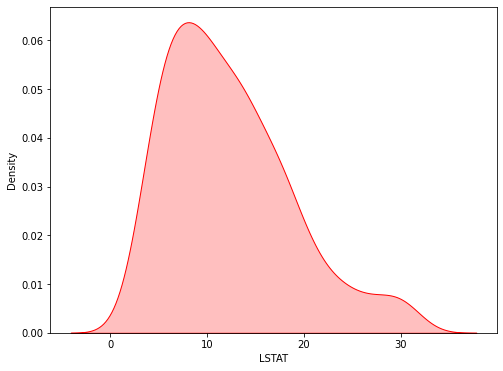

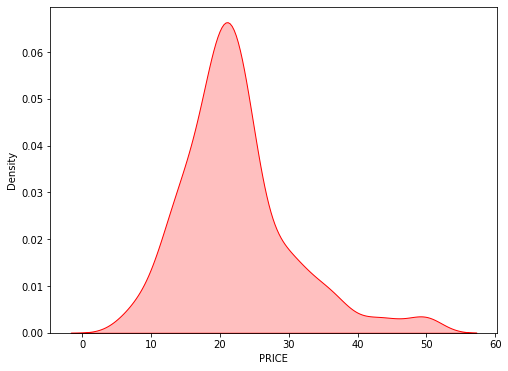

In [22]:
# KDE Plot
for col in data.columns:
    plt.figure(figsize= (8,6))
    ax = sns.kdeplot(data_clean[col], shade=True, color="r")
    plt.show()

In [23]:
# Calculate the skewness and kurtosis values

pd.DataFrame(data=[data_clean.skew(),data_clean.kurtosis()],index=['skewness','kurtosis'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
skewness,2.788612,2.296827,0.479840,0.0,0.883084,0.629424,-0.540736,0.754011,1.267864,0.852698,-0.823511,-3.809241,0.848393,1.119814
kurtosis,8.281047,4.681892,-1.018512,0.0,0.391447,1.302728,-0.984114,-0.371046,-0.222691,-0.763146,-0.169294,15.608594,0.317069,1.924205


In [24]:
## For simplicity remove all data with outliers
#q = titanic['Fare'].quantile(0.95)
# we are removing the top 10% data from the Fare column
#titanic_clean = titanic[titanic['Fare']<q]


#q = titanic_clean['Parch'].quantile(0.98)
# we are removing the top 2% data from the BMI column
#titanic_clean  = titanic_clean[titanic_clean['Parch']<q]
#q = titanic_clean['SibSp'].quantile(0.98)
# we are removing the top 2% data from the SkinThickness column
#titanic_clean  = titanic_clean[titanic_clean['SibSp']<q]


#deleted_entries = titanic.shape[0] - titanic_clean.shape[0]
#print("Entries deleted in the dataframe are :",  deleted_entries)

In [25]:
# Split dataset into features and target variable
X = data_clean.drop(columns = 'PRICE')
y = data_clean['PRICE']

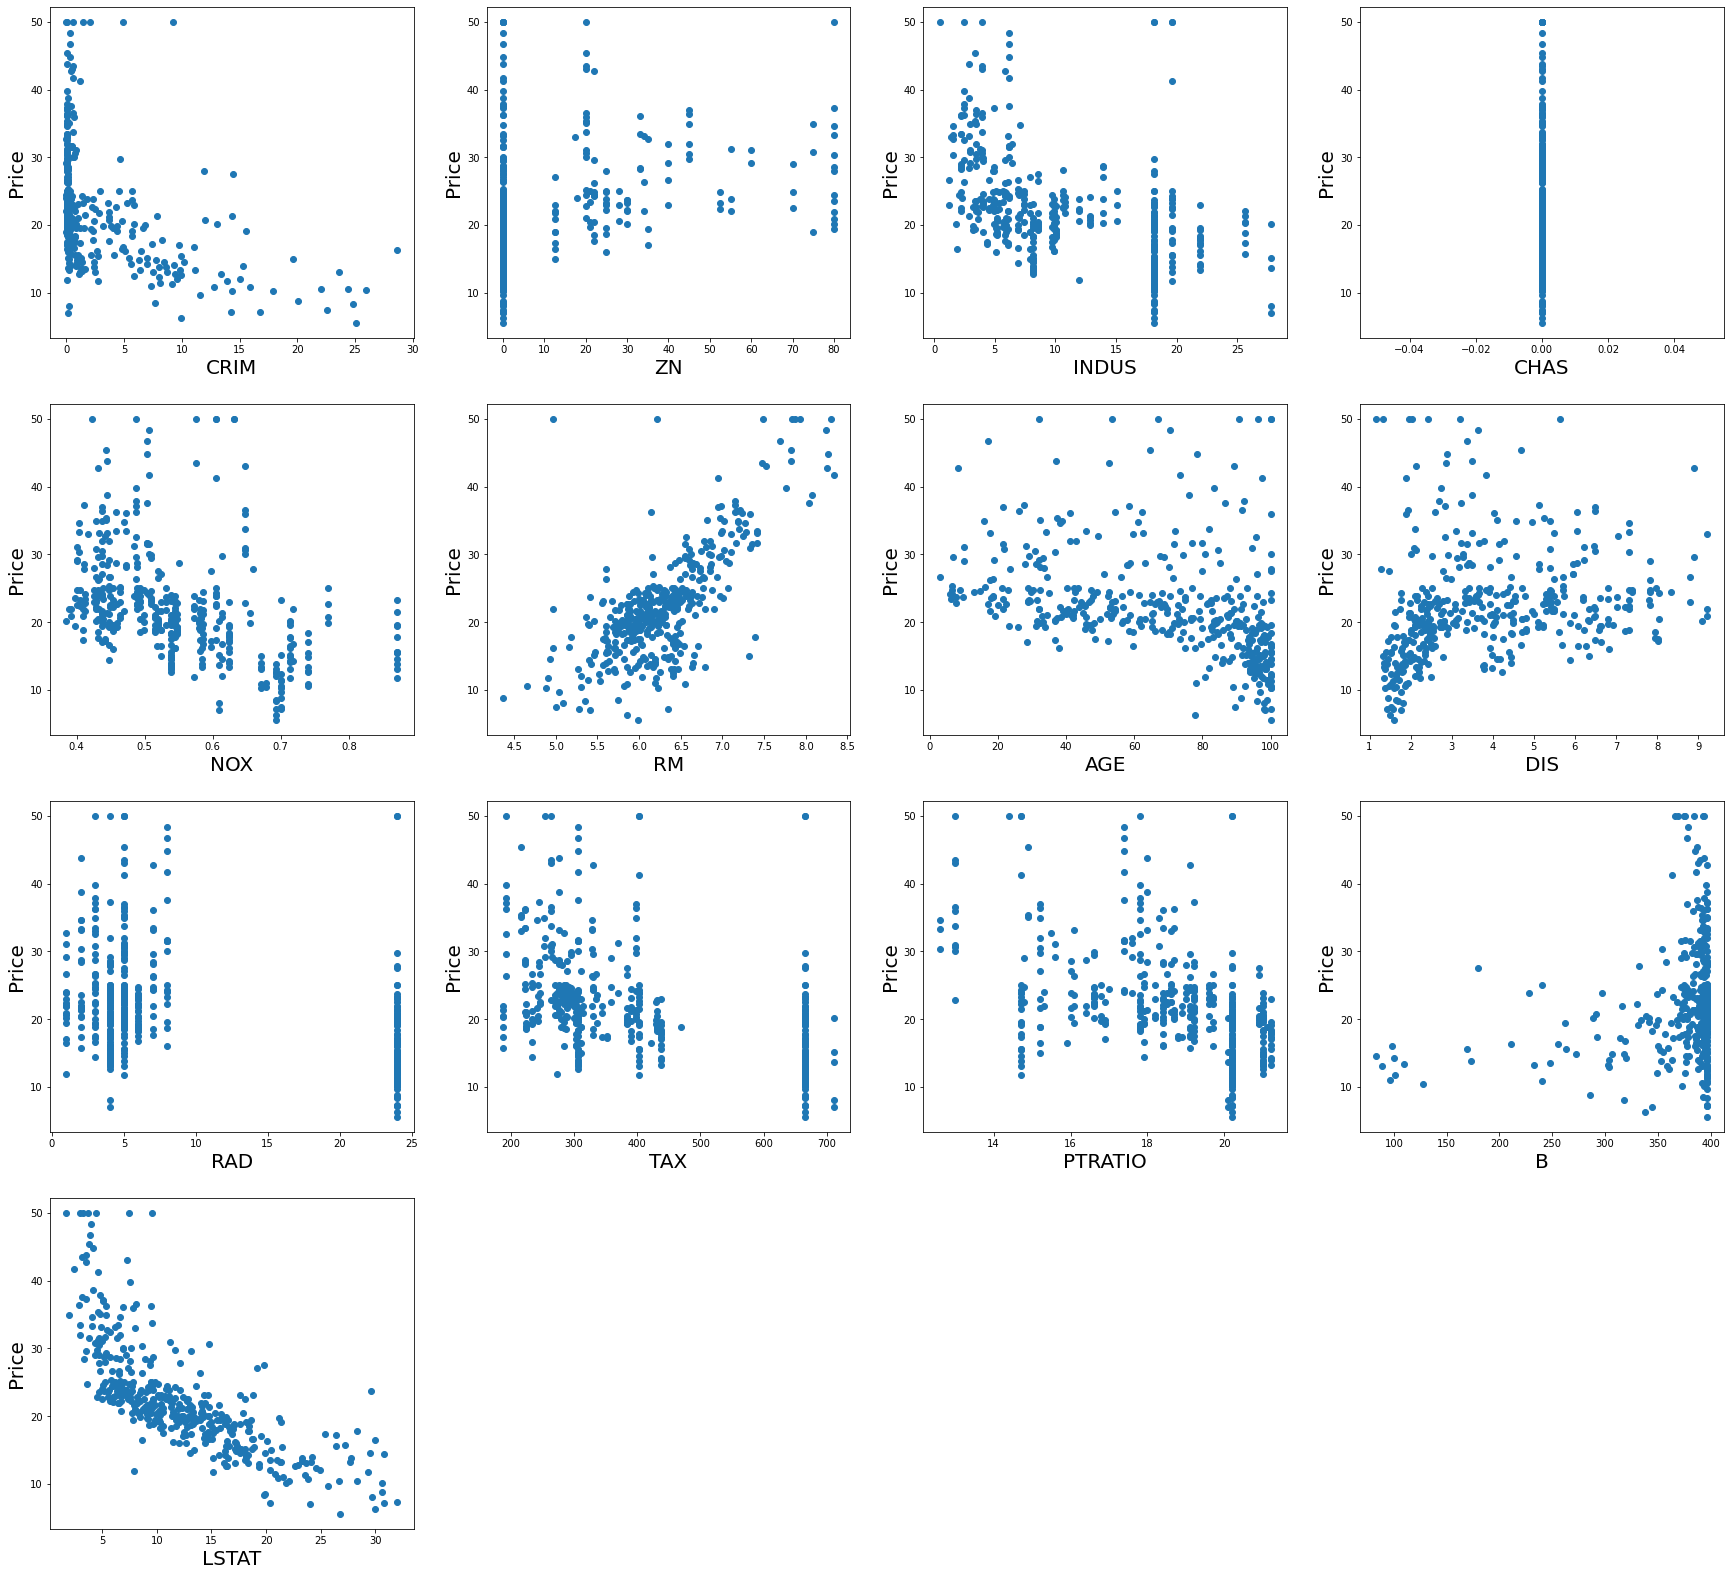

In [26]:
# let's see how data is distributed for every column
# create X and y
plt.figure(figsize=(30,28), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1

In [27]:
# Let's move ahead and check for multicollinearity.
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

vif

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,Features
0,3.248581,CRIM
1,1.975943,ZN
2,3.514458,INDUS
3,NaN,CHAS
4,4.494630,NOX
5,2.010522,RM
6,2.930040,AGE
7,3.612686,DIS
8,7.513658,RAD
9,7.470510,TAX


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We have RAD, TAX VIF values to be greater than 5 , so we remove them.



In [28]:
# We drop all columns with VIF greater than 5 due to colineraity 
to_drop_cols = vif[vif['VIF']> 5].Features.tolist()
# Drop columns
X.drop(to_drop_cols, axis= 1, inplace=True)
select_columns = X.columns.tolist()
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


Great! Let's go ahead and use Decision Tree Classfier and see how good it fits our data. But first. let's split our data in train and test.

In [29]:
# Split dataset into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.18)

In [30]:
# Normalize columns
sc =StandardScaler()

x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)


In [31]:
x_train[0:3]

array([[-0.33802664,  0.52396379, -0.98738337,  0.        ,  0.99311952,
        -1.13205729, -0.16775519, -0.94566939, -2.56501952,  0.35762656,
        -0.2794135 ],
       [-0.48159017, -0.48365889, -1.25074907,  0.        , -0.8027809 ,
         0.2502043 , -0.31378412,  1.1434599 ,  0.11346953,  0.39064269,
        -1.08060302],
       [-0.46276802,  1.78349214, -1.06536316,  0.        , -1.00232539,
         0.45039391, -1.36804179,  0.37689395, -1.53121673,  0.1741183 ,
        -1.17998722]])

In [32]:
#let's create our random forest object and fit our model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
# Evaluate model on train set
print("r2 score on train-set is :", r2_score(y_train, model.predict(x_train)))
print("MSE on train-set is :" , mean_squared_error(y_train, model.predict(x_train)))
print("MAE on train-set is :", mean_absolute_error(y_train, model.predict(x_train)))

r2 score on train-set is : 0.9787923922310555
MSE on train-set is : 1.4487275176470564
MAE on train-set is : 0.7950588235294093


In [34]:
# Evaluate model on test set

y_hat = model.predict(x_test)
print("r2 score on test-set is :", r2_score(y_test, y_hat))
print("MSE on test-set is :" , mean_squared_error(y_test, y_hat))
print("MAE on test-set is :", mean_absolute_error(y_test, y_hat))

r2 score on test-set is : 0.8149487561514794
MSE on test-set is : 9.301878266666664
MAE on test-set is : 2.167173333333333


There seem to be overfitting since the test-set error metrics are significantly greater than the train-set metrics. We would attempt to reduce this variance bt performing hyper paramter tuning.

### Hyperparameter tunning

In [35]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'n_estimators':[ 200, 500, 800],
    'max_depth' : range(2,20,1),
    'max_features' : ['auto','log2']   
}

In [36]:
# Create grid search object/class
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [37]:
# Fit model on training set
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [38]:
# Print best parameters
best_parameters = grid_search.best_params_
print(best_parameters)
print(grid_search.best_score_)

{'max_depth': 17, 'max_features': 'log2', 'n_estimators': 200}
0.8432355848615035


In [39]:
# Print best model
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=17, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
# Save model
import pickle
# Writing different model files to file
with open( 'RandomForest.pkl', 'wb') as f:
    pickle.dump(best_model,f)
    
with open('standardScalar.pkl', 'wb') as f:
    pickle.dump(sc,f)

In [41]:
# Let's train model using the best model
best_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=17, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
# Evaluate model on train set
print("r2 score on train-set is :", r2_score(y_train, best_model.predict(x_train)))
print("MSE on train-set is :" , mean_squared_error(y_train, best_model.predict(x_train)))
print("MAE on train-set is :", mean_absolute_error(y_train, best_model.predict(x_train)))

r2 score on train-set is : 0.97800147710684
MSE on train-set is : 1.5027562660593177
MAE on train-set is : 0.7988832409334724


In [43]:
# Evaluate model on test set

y_hat = best_model.predict(x_test)


print("r2 score on test-set is :", r2_score(y_test, y_hat))
print("MSE on test-set is :" , mean_squared_error(y_test, y_hat))
print("MAE on test-set is :", mean_absolute_error(y_test, y_hat))


r2 score on test-set is : 0.8049007579151092
MSE on test-set is : 9.806955965549392
MAE on test-set is : 2.2359265260665264
